In [1]:
# for data manipulation and analysis using DataFrames
import pandas as pd

# for numerical computations and array manipulations
import numpy as np

# for statistical data visualization
import seaborn as sns

# for cleaning and preprocessing text data
import neattext.functions as nfx

# logistic regression model for classification tasks
from sklearn.linear_model import LogisticRegression

# Naive Bayes model for text classification
from sklearn.naive_bayes import MultinomialNB

# to convert text data into numerical feature vectors
from sklearn.feature_extraction.text import CountVectorizer

# to split data into training and testing sets
from sklearn.model_selection import train_test_split

# for evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df =pd.read_csv("../data/emotion_dataset_raw.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

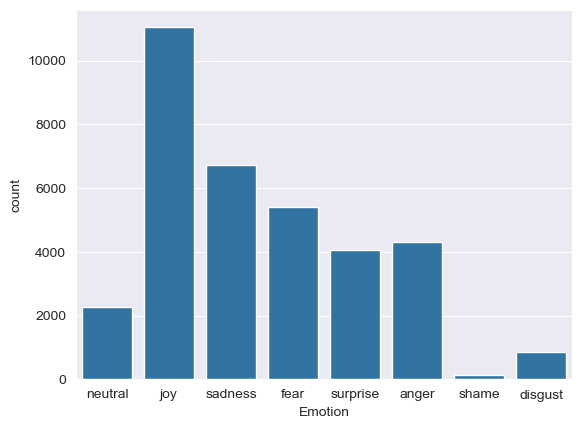

In [5]:
sns.countplot(x='Emotion', data=df)

In [6]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [7]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [8]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [9]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [10]:
xFeatures = df['Clean_Text']
yLables = df['Emotion']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(xFeatures, yLables, test_size=0.3, random_state=42)

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
pipe_lr=Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [14]:
pipe_lr.fit(x_train, y_train)

C:\Users\akden\anaconda3\envs\testEmotion\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [15]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [16]:
pipe_lr.score(x_test, y_test)

0.6201379574631155

In [17]:
ex1 = "This exam seems like going to be a bit challenging. I'm worried"

In [18]:
pipe_lr.predict([ex1])

array(['fear'], dtype=object)

In [19]:
pipe_lr.predict_proba([ex1])

array([[7.14668959e-03, 1.30703230e-03, 7.87090844e-01, 3.08268640e-02,
        1.48266183e-03, 1.68872385e-01, 1.29759894e-04, 3.14376347e-03]])

In [20]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [21]:
import joblib
pipeline_file = open("../models/emotion_detection_pipeline.pkl", "wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()